In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = {
    'attack type': ['SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection',
                    'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection',
                    'SQL Injection'],
    'injection payload': ['1 OR 1=1--', "admin'; DROP TABLE users;--", 'UNION SELECT username, password FROM users;--',
                          '1; UPDATE users SET password=12345 WHERE ...', 'SELECT * FROM information_schema.tables;--',
                          '1; DROP TABLE users;--', '1; SELECT * FROM users;--', '1 AND 1=2;--', '1 OR 1=1--',
                          "admin'; DROP TABLE users;--", 'another attack payload'],
    'attack outcome': ['Success', 'Failure', 'Failure', 'Failure', 'Success', 'Failure', 'Success', 'Success',
                       'Success', 'Failure', 'Success'],
    'attacker IP address': ['192.168.1.100', '10.0.0.2', '203.0.113.7', '198.51.100.3', '192.0.2.1', '198.51.100.5',
                            '203.0.113.9', '10.0.0.7', '192.168.1.105', '172.16.0.10', '192.168.1.102'],
    'affected rows anomaly': [True, False, True, True, True, False, True, True, True, True, False],
    'error_based_SQL_injection': [False, True, False, False, False, True, False, False, False, False, True]
}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df.drop(columns=['attack outcome']))  #hot encoding (conversion of values)

X = df_encoded
Y = df['attack outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.4


In [2]:
import pandas as pd

sql_attacks = pd.DataFrame({
    "attack type": ["SQL Injection"] * 11,
    "injection payload": ["1 OR 1=1--", "admin'; DROP TABLE users;--", "UNION SELECT username, password FROM users;--", "1; UPDATE users SET password=12345 WHERE ...", "SELECT * FROM information_schema.tables;--", "1; DROP TABLE users;--", "1; SELECT * FROM users;--", "1 AND 1=2;--", "1 OR 1=1--", "admin'; DROP TABLE users;--", "another attack payload"],
    "attack outcome": ["Success", "Failure", "Failure", "Failure", "Success", "Failure", "Success", "Success", "Success", "Failure", "Success"],
    "attacker IP address": ['192.168.1.100', '10.0.0.2', '203.0.113.7', '198.51.100.3', '192.0.2.1', '198.51.100.5', '203.0.113.9', '10.0.0.7', '192.168.1.105', '172.16.0.10', '192.168.1.102'],
    "affected rows anomaly": [True, False, True, True, True, False, True, True, True, True, False],
    "error_based_SQL_injection": [False, True, False, False, False, True, False, False, False,False,True]
})
sql_attacks

,attack type,injection payload,attack outcome,attacker IP address,affected rows anomaly,error_based_SQL_injection
0,SQL Injection,1 OR 1=1--,Success,192.168.1.100,True,False
1,SQL Injection,admin'; DROP TABLE users;--,Failure,10.0.0.2,False,True
2,SQL Injection,"UNION SELECT username, password FROM users;--",Failure,203.0.113.7,True,False
3,SQL Injection,1; UPDATE users SET password=12345 WHERE ...,Failure,198.51.100.3,True,False
4,SQL Injection,SELECT * FROM information_schema.tables;--,Success,192.0.2.1,True,False
5,SQL Injection,1; DROP TABLE users;--,Failure,198.51.100.5,False,True
6,SQL Injection,1; SELECT * FROM users;--,Success,203.0.113.9,True,False
7,SQL Injection,1 AND 1=2;--,Success,10.0.0.7,True,False
8,SQL Injection,1 OR 1=1--,Success,192.168.1.105,True,False
9,SQL Injection,admin'; DROP TABLE users;--,Failure,172.16.0.10,True,False


In [3]:
df

,attack type,injection payload,attack outcome,attacker IP address,affected rows anomaly,error_based_SQL_injection
0,SQL Injection,1 OR 1=1--,Success,192.168.1.100,True,False
1,SQL Injection,admin'; DROP TABLE users;--,Failure,10.0.0.2,False,True
2,SQL Injection,"UNION SELECT username, password FROM users;--",Failure,203.0.113.7,True,False
3,SQL Injection,1; UPDATE users SET password=12345 WHERE ...,Failure,198.51.100.3,True,False
4,SQL Injection,SELECT * FROM information_schema.tables;--,Success,192.0.2.1,True,False
5,SQL Injection,1; DROP TABLE users;--,Failure,198.51.100.5,False,True
6,SQL Injection,1; SELECT * FROM users;--,Success,203.0.113.9,True,False
7,SQL Injection,1 AND 1=2;--,Success,10.0.0.7,True,False
8,SQL Injection,1 OR 1=1--,Success,192.168.1.105,True,False
9,SQL Injection,admin'; DROP TABLE users;--,Failure,172.16.0.10,True,False


0.6
['Success' 'Success' 'Failure' 'Success' 'Success']
Success Percentage: 80.0
Failure Percentage: 20.0
5
4
1


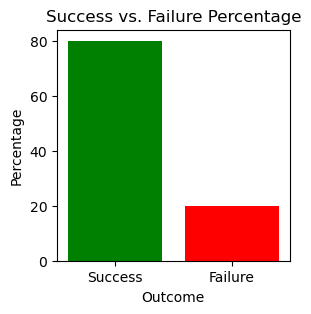

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

data = {
    'attack type': ['SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection',
                    'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection', 'SQL Injection',
                    'SQL Injection'],
    'injection payload': ['1 OR 1=1--', "admin'; DROP TABLE users;--", 'UNION SELECT username, password FROM users;--',
                          '1; UPDATE users SET password=12345 WHERE ...', 'SELECT * FROM information_schema.tables;--',
                          '1; DROP TABLE users;--', '1; SELECT * FROM users;--', '1 AND 1=2;--', '1 OR 1=1--',
                          "admin'; DROP TABLE users;--", 'another attack payload'],
    'attack outcome': ['Success', 'Failure', 'Failure', 'Failure', 'Success',
                       'Failure', 'Success', 'Success', 'Success', 'Failure',
                       'Success'],
    'attacker IP address': ['192.168.1.100', '10.0.0.2', '203.0.113.7', '198.51.100.3', '192.0.2.1',
                            '198.51.100.5', '203.0.113.9', '10.0.0.7', '192.168.1.105', '172.16.0.10',
                            '192.168.1.102'],
    'affected rows anomaly': [True, False, True, True, True, False, True, True, True, True, False],
    'error_based_SQL_injection': [False, True, False, False, False, True, False, False, False, False, True]
    
}

df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['attack type', 'injection payload', 'attacker IP address']) # we use dummies to get conversion of values(hot-encoding)

X = df.drop(columns=['attack outcome']) #features
y = df['attack outcome']                #main target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)      # X6
print(predictions)   # X6

success_count = sum(predictions == 'Success')
failure_count = sum(predictions == 'Failure')

total_predictions = len(predictions)

success_percentage = (success_count / total_predictions) * 100
failure_percentage = (failure_count / total_predictions) * 100

print("Success Percentage:", success_percentage)    # X6
print("Failure Percentage:", failure_percentage)    # X6

print(total_predictions)  # X6
print(success_count)      # X6
print(failure_count)      # X6

import matplotlib.pyplot as plt  # we use this to show a graph

categories = ['Success', 'Failure']
percentages = [success_percentage, failure_percentage]

plt.figure(figsize=(3, 3))
plt.bar(categories, percentages, color=['green', 'red'])

plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Success vs. Failure Percentage')

plt.show()  # X6